# **Small Project: Emotion Recognition**

### **Tasks**: Solve a classification problem using the knowledge acquired from coursework and online resources.

In the lectures and labs, we have explained applied AI for image processing. This small project will focus on speech. You can imagine that the input features of speech resemble those of image input.
The aim of this project is to encourage you to adapt the learned concepts from conventional image processing to audio processing, as the techniques are quite generalizable.

You are allowed to search or use additional data and pre-trained models.


Some suggestions (but not limit to):
* different NNs
* different pooling layers to get time-invariant feature map..
* data augmentation: [copy-paste, noise augmentation](https://arxiv.org/pdf/2010.14602)..
* using Pre-trained SSL models: [wav2lm, Hubert](https://arxiv.org/pdf/2202.03896), [emotion2vec](https://arxiv.org/abs/2312.15185)..
* more from you :)

Note that **the baseline performance is just 54.53% (show after running [17] code cell) the SOTA is above 75%, a lot for you to implement!**



```
| Batch Size  | GPU       | Test-UAR | Time Taken |
|-------------|-----------|----------|------------|
| 256         | A100-40GB | 54.04%   | 30 mins    |
| 128         | T4-15GB   | 54.53%   | < 1 hour    |

```



How to get new ideas to improve performence?
* listen to some misclassified audio clips and try to do more analysis, this helps you gain a deeper understanding of the problem and come up with an idea
* check papers, always prioritize highly-cited ones and those that provide code

### **Submission rules**:



1.   Submit  "label.csv" to [kaggle](https://www.kaggle.com/t/dd096ee9ffeb4bcbb858a8d01da11d0d) to see your real-time ranking, note that the maximum number of submissions per day is 1.

  * You should not modify your prediction files manually
  * Do not share codes or prediction files with any living creatures.
  * Your final grade x 0.9 and 0 pt for this HW if you violate any of the above rules.

<img src="https://drive.google.com/uc?id=1VasPqFMYodx-NE5JQhQk5GHp-mxZIh5v" alt="altertext" width="400">

2.   Submit your **notebook code with all outputs**  to the [small-project](https://xsite.singaporetech.edu.sg/d2l/lms/dropbox/admin/mark/folder_submissions_files.d2l?d2l_isfromtab=1&db=66115&ou=144676) Dropbox by October 10 (week6, Thursday). Everyone must submit their own notebook. If you are working in a group, the notebook can be the same for all members.

**IMPORTANT**: the notebook filename is

```
"name1_name2_name*_testUA_{testUA_yourscript_achieved, 4 digits after the decimal point}.ipynb",
e.g. xiaoxiaomiao_mahesh_testUA_0.5404.ipynb

```
3. Submit your **presentation slides** to the small-project Dropbox by October 10 (week6, Thursday). Suggest to prepare no more than 3 presentation slides, the content should includes all your modifications, e.g. data, model, loss.. and show the results changes accordingly, better to have some analysis.. control your presentation within 5 minutes.
---





### **Evaluation rules**:

1. Performance Ranking
2. Method Nolvelty
3. Presentation @ Week6 Lab




### Current model is a simplified version from "3-D Convolutional Recurrent Neural Networks With Attention Model for Speech Emotion Recognition"

![altertext](https://drive.google.com/uc?id=1bHrsMSjWKf1XgmCshPrSU81fVSsNhfP4)

[Paper link](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8421023&casa_token=AGqWGVSS5lAAAAAA:cM6X58aNcHVZmsVC1r_ZxawguzlzMHMhxZzsLdxdYf7ogidcBmUmMHhgwKH6H33TGBGRXV1XUQYo0A&tag=1)

[Github link](https://github.com/xuanjihe/speech-emotion-recognition/tree/master)



# Download Data

We use [IEMOCAP dataset](https://paperswithcode.com/dataset/iemocap), and select four emotions (**N**eutral, **H**appy, **S**ad, **A**ngry) from 5 sessions. Each session features 2 speakers (1 male and 1 female), and each speaker has 4 emotional speech recordings.

* The IDs are: ['Ses01F', 'Ses01M', 'Ses02F', 'Ses02M', 'Ses03F', 'Ses03M', 'Ses04F', 'Ses04M', 'Ses05F', 'Ses05M'].
* We choose 'Ses01F' as the test set, which includes the four emotional speech recordings from session 01 with the female speaker.
* We choose 'Ses01M' as the validation set, which includes the four emotional speech recordings from session 01 with the male speaker.
* The remaining sessions are used as the training data. Each emotion has the following number of training samples:
[['A', 874], ['H', 1358], ['N', 1324], ['S', 890]]


In [1]:
! nvidia-smi #make sure you choose GPU, the default type is CPU, click change runtime type, set hardware accelerator to *GPU

Wed Oct  9 11:58:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!gdown 13Gue1-EwvpzK2bZEFpTSGKdB5oDhUjbf
!unzip -o small-project.zip -d small-project
!pip install torchinfo

Streaming output truncated to the last 5000 lines.
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses01M_script01_3_M004.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses05F_script02_2_F015.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses04M_impro08_M024.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses01F_script03_2_M011.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses01F_script01_1_F029.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses05M_impro08_M022.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses04M_script02_2_F016.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses01F_script03_2_M005.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses03F_script01_3_F003.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses02M_script0

#Import Packages


In [3]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import soundfile as sound
import datetime
import sys, subprocess
import math
import random
import librosa
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, ExponentialLR, CosineAnnealingLR
import torchaudio
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
from tqdm import tqdm
import logging
import time

from sklearn.metrics import confusion_matrix, classification_report, recall_score
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchaudio import functional as audioF
from torchaudio.compliance import kaldi
from transformers import Wav2Vec2Model, Wav2Vec2FeatureExtractor
from torchinfo import summary

# Some Utility Functions
**Fixes random number generator seeds for reproducibility.**

In [4]:
def setup_seed(seed=2021):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True


**Helper functions to pre-process the training data from raw Fbank features of each utterance.**

The sample rate of speech is 16K (the number of samples per second is 16000)

The input length for each utterance is different, cut them to 6s if larger than 6s, copy speech until 6s if less than 6s


In [5]:
class Pad_trunc_wav(nn.Module):
    def __init__(self, max_len: int = 6*16000):
        super(Pad_trunc_wav, self).__init__()
        self.max_len = max_len
    def forward(self,x):
        shape = x.shape
        length = shape[1]
        if length < self.max_len:
            multiple = self.max_len//length+1
            x_tmp = torch.cat((x,)*multiple, axis=1)
            x_new = x_tmp[:,0:self.max_len]
        else:
            x_new = x[:,0:self.max_len]
        return x_new


In [6]:
class Deltas_Deltas_FBank(nn.Module):
    #(…, freq, time)
    def __init__(self):
        super(Deltas_Deltas_FBank, self).__init__()
    def forward(self,x):
        # x: time*freq
        x = x.permute(1,0).unsqueeze(0)
        delta = audioF.compute_deltas(x)
        delta2 = audioF.compute_deltas(delta)
        x_out = torch.cat((x,delta,delta2), 0).permute(0,2,1)
        # x_out: 3*freq*time -> 3*time*freq
        return x_out


In [7]:
class AudioAugmentation:
    def __init__(self, sample_rate=16000):
        self.sample_rate = sample_rate

    def time_stretch(self, audio, rate=1.0):
        if rate == 1.0:  # No change
            return audio

        orig_len = audio.shape[1]
        audio = F.interpolate(audio.unsqueeze(1), scale_factor=rate, mode='linear', align_corners=False).squeeze(1)

        # Pad or trim to original length
        if audio.shape[1] > orig_len:
            audio = audio[:, :orig_len]
        else:
            audio = F.pad(audio, (0, orig_len - audio.shape[1]))

        return audio

    def pitch_shift(self, audio, n_steps):
        if n_steps == 0:  # No change
            return audio

        factor = 2 ** (n_steps / 12)
        audio = torchaudio.functional.resample(audio, self.sample_rate, int(self.sample_rate * factor))

        # Pad or trim to match original length
        orig_len = int(self.sample_rate * (audio.shape[1] / (self.sample_rate * factor)))
        if audio.shape[1] > orig_len:
            audio = audio[:, :orig_len]
        else:
            audio = F.pad(audio, (0, orig_len - audio.shape[1]))

        return audio

    def add_noise(self, audio, noise_level=0.005):
        noise = torch.randn_like(audio) * noise_level
        return audio + noise

    def time_mask(self, audio, time_mask_param=80):
        mask_len = int(audio.shape[1] * time_mask_param / 100)
        mask_start = torch.randint(0, audio.shape[1] - mask_len + 1, (1,)).item()
        audio[:, mask_start:mask_start+mask_len] = 0
        return audio

    def apply_augmentation(self, audio):
        #aug_type = random.choice(['time_stretch', 'pitch_shift', 'add_noise', 'time_mask'])
        aug_type = "add_noise"
        if aug_type == 'time_stretch':
            return self.time_stretch(audio, rate=random.uniform(0.8, 1.2))
        elif aug_type == 'pitch_shift':
            return self.pitch_shift(audio, n_steps=random.randint(-4, 4))
        elif aug_type == 'add_noise':
            return self.add_noise(audio, noise_level=random.uniform(0.001, 0.01))
        else:
            return self.time_mask(audio, time_mask_param=random.randint(10, 50))

In [8]:
def mixup_data(x, y, alpha=0.2):
    '''Returns mixed inputs, pairs of targets, and lambda'''
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1

    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# Dataset

In [9]:
class Mydataset(Dataset):
    def __init__(self, mode='train', max_len=6, seed=42, sample_rate=16000):
        self.mode = mode
        self.sample_rate = sample_rate  # Add this line
        data_all = pd.read_csv('small-project/small-project/IEMOCAP_4.tsv',sep='\t')
        SpkNames = np.unique(data_all['speaker'])
        self.data_info = self.split_dataset(data_all, SpkNames)
        self.get_audio_dir_path = os.path.join('small-project/small-project/IEMOCAP_full_release_audio/')
        self.pad_trunc = Pad_trunc_wav(max_len * sample_rate)
        self.transform = Deltas_Deltas_FBank()
        self.label = self.data_info['label'].astype('category').cat.codes.values
        self.audio_augmentation = AudioAugmentation(sample_rate=sample_rate)
        self.feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/wav2vec2-large")
        self.max_len = max_len * sample_rate

        self.ClassNames = np.unique(self.data_info['label'])
        self.NumClasses = len(self.ClassNames)
        if mode == 'train':
          print("Each emotion has the following number of training samples:")
          print([[self.ClassNames[i], (self.label == i).sum()] for i in range(self.NumClasses)])
        self.weight = 1/torch.tensor([(self.label==i).sum() for i in range(self.NumClasses)]).float()

    def get_classname(self):

        return  self.ClassNames

    def split_dataset(self, df_all, speakers):
        spk_len = len(speakers)
        test_idx = np.array(df_all['speaker']==speakers[0]) # audio from 'Ses01F' as test set
        val_idx = np.array(df_all['speaker']==speakers[1]) #  audio from 'Ses01M' as val set
        train_idx = True^(test_idx+val_idx)
        train_data_info = df_all[train_idx].reset_index(drop=True)
        val_data_info = df_all[val_idx].reset_index(drop=True)
        test_data_info = df_all[test_idx].reset_index(drop=True)

        if self.mode == 'train':
            data_info = train_data_info
        elif self.mode == 'val':
            data_info = val_data_info
        elif self.mode == 'test':
            data_info = test_data_info
        else:
            data_info = df_all
        return data_info

    def pre_process(self, wav):
        wav = self.pad_trunc(wav)
        return wav

    def extract_fbank(self, wav, sample_rate):
        wav = wav * (1 << 15)
        if sample_rate!=16000:
            # if sample rate is not 16k, change (transform) to 16k
            wav = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(wav)
        # Extract Raw Fbank feature, the Fbank feature dimension is 80
        spec = kaldi.fbank(wav,num_mel_bins=80,frame_length=25,frame_shift=10,sample_frequency=16000,high_freq=8000,low_freq=0,window_type='hamming')
        return spec

    def __len__(self):
        return len(self.data_info)

    def __getitem__(self, idx):
        wav, sample_rate = torchaudio.load(os.path.join(self.get_audio_dir_path, self.data_info.filename[idx]) + '.wav')

        if sample_rate != self.sample_rate:
            wav = torchaudio.functional.resample(wav, sample_rate, self.sample_rate)

        wav = self.pad_trunc(wav)

        if self.mode == 'train':
            wav = self.audio_augmentation.apply_augmentation(wav)

        # Ensure the audio is the correct length
        if wav.shape[1] > self.max_len:
            wav = wav[:, :self.max_len]
        elif wav.shape[1] < self.max_len:
            wav = torch.nn.functional.pad(wav, (0, self.max_len - wav.shape[1]))

        # Convert to mono if stereo
        if wav.shape[0] > 1:
            wav = wav.mean(dim=0, keepdim=True)

        # Prepare input for wav2vec feature extractor
        wav_input = wav.squeeze().numpy()

        inputs = self.feature_extractor(wav_input, sampling_rate=self.sample_rate, return_tensors="pt")
        input_values = inputs.input_values.squeeze()

        label = torch.tensor(self.label[idx]).long()

        return input_values, label, self.data_info.filename[idx]

# Model

In [10]:
class Wav2Vec2SER(nn.Module):
    def __init__(self, num_classes=4):
        super(Wav2Vec2SER, self).__init__()
        self.wav2vec2 = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-large")
        self.classifier = nn.Sequential(
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        features = self.wav2vec2(x).last_hidden_state
        pooled_features = torch.mean(features, dim=1)
        logits = self.classifier(pooled_features)
        return nn.functional.log_softmax(logits, dim=-1), pooled_features

# Hyper-parameters

In [11]:
# Setup environment and arguments
seed = 2024 # random seed
batch_size = 16  # batch size, reduce batch size, if you get out of memory problem
epochs = 200  # the number of training epoch
max_len = 6 # the input length for training
lr = 0.0001  # learning rate
# loss_type = 'CE' #loss function
# optimizer_type = 'Adam' # optimizer, can try Adam or others

# Define Save Log Function

In [12]:
def get_logger(filename, verbosity=1, name=None):
    level_dict = {0: logging.DEBUG, 1: logging.INFO, 2: logging.WARNING}
    formatter = logging.Formatter("[%(asctime)s][%(filename)s][line:%(lineno)d][%(levelname)s] %(message)s")
    logger = logging.getLogger(name)
    logger.setLevel(level_dict[verbosity])

    fh = logging.FileHandler(filename, "w")
    fh.setFormatter(formatter)
    logger.addHandler(fh)

    sh = logging.StreamHandler()
    sh.setFormatter(formatter)
    logger.addHandler(sh)

    return logger


# Training

In [13]:
def train(model, device, train_loader, criterion, optimizer, scheduler, epoch, logger):
    model.train()
    logger.info('start training')

    lr = optimizer.param_groups[0]["lr"]
    logger.info('lr: {:.5f}'.format(lr))

    correct = 0

    for batch, data in tqdm(enumerate(train_loader)):
        spec, emo_label, _ = data
        spec, emo_label = spec.to(device), emo_label.to(device)

        # Apply mixup
        spec, emo_label_a, emo_label_b, lam = mixup_data(spec, emo_label)

        optimizer.zero_grad()

        emo_output, _ = model(spec)
        loss = mixup_criterion(criterion, emo_output, emo_label_a, emo_label_b, lam)

        loss.backward()
        nn.utils.clip_grad_norm_([param for param in model.parameters() if param.requires_grad], max_norm=10, norm_type=2)
        optimizer.step()
        scheduler.step()

        # For simplicity, we'll just use the first set of labels for accuracy calculation
        pred = emo_output.argmax(dim=1, keepdim=True)
        correct += pred.eq(emo_label_a.view_as(pred)).sum().item()

        if batch % 20 == 0:
            logger.info('Epoch: {} [{}/{} ({:.0f}%)]\\t loss={:.5f}\\t '.format(epoch, batch * len(emo_label), len(train_loader.dataset), 100. * batch / len(train_loader), loss.item()))

    logger.info('Train set Accuracy: {}/{} ({:.3f}%)'.format(correct, len(train_loader.dataset), 100. * correct / (len(train_loader.dataset))))
    logger.info('finish training!')
    return loss

# Testing

In [14]:
import pandas as pd
def test(model, device, dataset_type, val_loader, criterion, logger, target_names):
    model.eval()
    test_loss = 0
    correct = 0
    logger.info('testing on {}'.format(dataset_type))

    pred_all = np.array([],dtype=np.int64)
    true_all = np.array([],dtype=np.int64)
    nameIDs = np.array([],dtype=str)

    embs_all = []  # Collect all embeddings

    with torch.no_grad():
        for spec, label, nameID in tqdm(val_loader):
            #spec, label = [x.to(device) for x in spec], label.to(device)
            spec, label = spec.to(device), label.to(device)
            output,embs = model(spec)
            test_loss += criterion(output, label).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(label.view_as(pred)).sum().item()

            pred = output.data.max(1)[1].cpu().numpy()
            true = label.data.cpu().numpy()
            pred_all = np.append(pred_all,pred)
            true_all = np.append(true_all,true)
            nameIDs = np.append(nameIDs,nameID)

            embs_all.append(embs.cpu().numpy())  # Collect embeddings

    test_loss /= len(val_loader.dataset)
    acc = 100. * correct / len(val_loader.dataset)

    logger.info('{}: Average loss: {:.4f}, Accuracy: {}/{} ({:.3f}%)\n'.format(dataset_type,
        test_loss, correct, len(val_loader.dataset), acc))

    if dataset_type == 'test':
      con_mat = confusion_matrix(true_all,pred_all)
      cls_rpt = classification_report(true_all,pred_all,target_names=target_names,digits=3)
      logger.info('Confusion Matrix:\n{}\n'.format(con_mat))
      logger.info('Classification Report:\n{}\n'.format(cls_rpt))
      # Check if lengths match
      if len(nameIDs) == len(pred_all):
          # Create DataFrame with the combined data
          df = pd.DataFrame({
              'ID': nameIDs,
              'Predict': pred_all,
          })

          # Save DataFrame to a CSV file
          df.to_csv('label.csv', index=False)
          print("Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.")
      else:
          print(f"Length mismatch: nameIDs length is {len(nameIDs)}, pred_all length is {len(pred_all)}")
      #np.savez('results.npz', true_all=true_all, pred_all=pred_all)


    UA = recall_score(true_all,pred_all,average='macro')
    WA = recall_score(true_all,pred_all,average='weighted')


    # Concatenate all embeddings
    embs_all = np.concatenate(embs_all, axis=0)

    return test_loss,UA,WA, embs_all, true_all


# Early Stopping

In [15]:
def early_stopping(network, savepath, metricsInEpochs, gap):
    best_metric_inx = np.argmax(metricsInEpochs)
    if best_metric_inx + 1 == len(metricsInEpochs):
        best = os.path.join(savepath, f'best_epoch_{best_metric_inx + 1}.pt')
        torch.save(network.state_dict(), best)  # Save only the state dict
        return False
    elif (len(metricsInEpochs) - best_metric_inx >= gap):
        return True
    else:
        return False

In [16]:
def load_best_model(model, savepath):
    best_model_path = max([os.path.join(savepath, f) for f in os.listdir(savepath) if f.startswith('best_epoch_')], key=os.path.getctime)
    model.load_state_dict(torch.load(best_model_path))
    return model

In [17]:
savedir = 'exp'
setup_seed(seed)
stamp = datetime.datetime.now().strftime('%y%m%d%H%M')
tag = stamp + '_' + str(epochs)
try:
    os.makedirs(savedir)
except OSError:
    if not os.path.isdir(savedir):
        raise

logpath = savedir + "/exp.log"
modelpath = savedir + "/model.pt"

use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")

# Dataloader

In [18]:
train_set = Mydataset(mode='train', max_len=max_len, seed=seed, sample_rate=16000)
val_set = Mydataset(mode='val', max_len=max_len, seed=seed, sample_rate=16000)
test_set = Mydataset(mode='test', max_len=max_len, seed=seed, sample_rate=16000)

drop_last = True if len(train_set)%batch_size<2 else False
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=drop_last)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True)

def collate_fn(batch):
    input_values, labels, filenames = zip(*batch)
    input_values = torch.stack(input_values)
    labels = torch.stack(labels)
    return input_values, labels, filenames

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True, collate_fn=collate_fn)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True, collate_fn=collate_fn)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True, collate_fn=collate_fn)

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

Each emotion has the following number of training samples:
[['A', 874], ['H', 1358], ['N', 1324], ['S', 890]]


# Define Model, Optimizer, Learning Rate Decay Schedure

In [19]:
logger = get_logger(logpath)
criterion = nn.CrossEntropyLoss()
criterion_test = nn.CrossEntropyLoss()

In [20]:
model = Wav2Vec2SER(num_classes=train_set.NumClasses).to(device)

config.json:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.27G [00:00<?, ?B/s]

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-large and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(), lr=lr, weight_decay=0.0001)
num_training_steps = len(train_loader) * epochs
num_warmup_steps = num_training_steps // 10
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps)

# Model Checks
## Checking input size, model parameters

In [26]:
# Get one batch of data
for batch in train_loader:
    # Check the shape of the inputs and labels
    print(f"Inputs shape: {batch[0].shape}")
    print(f"Labels shape: {batch[1].shape}")
    break  # Exit after the first batch


Inputs shape: torch.Size([16, 96000])
Labels shape: torch.Size([16])


In [28]:
summary(model, input_size=(16, 96000))

Layer (type:depth-idx)                                  Output Shape              Param #
Wav2Vec2SER                                             [16, 4]                   --
├─Wav2Vec2Model: 1-1                                    [16, 299, 512]            1,024
│    └─Wav2Vec2FeatureEncoder: 2-1                      [16, 512, 299]            --
│    │    └─ModuleList: 3-1                             --                        4,200,448
│    └─Wav2Vec2FeatureProjection: 2-2                   [16, 299, 1024]           --
│    │    └─LayerNorm: 3-2                              [16, 299, 512]            1,024
│    │    └─Linear: 3-3                                 [16, 299, 1024]           525,312
│    │    └─Dropout: 3-4                                [16, 299, 1024]           --
│    └─Wav2Vec2Encoder: 2-3                             [16, 299, 1024]           --
│    │    └─Wav2Vec2PositionalConvEmbedding: 3-5        [16, 299, 1024]           8,389,760
│    │    └─LayerNorm: 3-6         

# Main Training Loop

In [ ]:

val_UA_list = []
test_UA_dic = {}
test_WA_dic = {}

train_losses = []
val_losses = []

for epoch in range(1, epochs+1):
    start = time.time()
    train_loss = train(model, device, train_loader, criterion, optimizer, scheduler, epoch, logger)
    train_losses.append(train_loss)

    time.sleep(0.003)
    val_loss,val_UA,_,_,_= test(model, device, 'val', val_loader, criterion_test, logger, train_set.ClassNames)
    val_losses.append(val_loss)
    end = time.time()
    duration = end-start
    val_UA_list.append(val_UA)
    if early_stopping(model,savedir,val_UA_list,gap=10):
        print('val loss has not been decreased for 10 epochs, stop training \n')
        break

    scheduler.step(val_UA)
    logger.info("-"*50)
    logger.info('Epoch {:2d} | Time {:5.4f} sec | Valid Loss {:5.4f} '.format(epoch, duration, val_loss))
    logger.info("-"*50)
    time.sleep(0.003)



[2024-10-08 20:29:20,169][1280055776.py][line:3][INFO] start training
[2024-10-08 20:29:20,169][1280055776.py][line:6][INFO] lr: 0.00000
0it [00:00, ?it/s][2024-10-08 20:29:21,225][1280055776.py][line:32][INFO] Epoch: 1 [0/4446 (0%)]\t loss=1.38433\t 
20it [00:12,  1.66it/s][2024-10-08 20:29:33,092][1280055776.py][line:32][INFO] Epoch: 1 [320/4446 (7%)]\t loss=1.66648\t 
40it [00:24,  1.67it/s][2024-10-08 20:29:45,120][1280055776.py][line:32][INFO] Epoch: 1 [640/4446 (14%)]\t loss=1.64349\t 
60it [00:36,  1.65it/s][2024-10-08 20:29:57,098][1280055776.py][line:32][INFO] Epoch: 1 [960/4446 (22%)]\t loss=1.35544\t 
80it [00:48,  1.65it/s][2024-10-08 20:30:09,196][1280055776.py][line:32][INFO] Epoch: 1 [1280/4446 (29%)]\t loss=1.52320\t 
100it [01:00,  1.69it/s][2024-10-08 20:30:21,275][1280055776.py][line:32][INFO] Epoch: 1 [1600/4446 (36%)]\t loss=1.27235\t 
120it [01:12,  1.63it/s][2024-10-08 20:30:33,382][1280055776.py][line:32][INFO] Epoch: 1 [1920/4446 (43%)]\t loss=1.59077\t 
140it 

val loss has not been decreased for 10 epochs, stop training 



# Use best model on val set to compute performance on test set and save model



## flags
++++++++++++++++++++++

use-data-aug=True # False or Additional (Time Stretch, Pitch Shift, Add Noise, Time Mask)

use-pre-trained-model=True (False - self-defined conv block)

finetune=True

optimizer=AdamW

epoch_number = 74

Loss = Cross Entropy Loss # NLLLoss



++++++++++++++++++++++

**Test UAR - unweighted average recall, the baseline is 0.5404. We use this value to rank your system. Please work on improving this value**

In [ ]:

test_loss,test_UA,test_WA, embs, true_labels = test(model, device,'test', test_loader, criterion_test, logger, train_set.ClassNames)
logger.info('test UA: {}  @epoch: {}'.format(test_UA, epoch)) #unweighted average recall
#logger.info('test WA: {}  @epoch: {}'.format(test_WA,epoch))  # weighted average recall
torch.save(model.state_dict(), modelpath)

[2024-10-09 00:32:55,378][327560537.py][line:6][INFO] testing on test
100%|██████████| 33/33 [00:07<00:00,  4.68it/s]
[2024-10-09 00:33:02,433][327560537.py][line:34][INFO] test: Average loss: 0.0813, Accuracy: 348/528 (65.909%)

[2024-10-09 00:33:02,438][327560537.py][line:40][INFO] Confusion Matrix:
[[130   6  10   1]
 [ 12 112   6   2]
 [ 17  62  69  23]
 [  1  24  16  37]]

[2024-10-09 00:33:02,438][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.812     0.884     0.847       147
           H      0.549     0.848     0.667       132
           N      0.683     0.404     0.507       171
           S      0.587     0.474     0.525        78

    accuracy                          0.659       528
   macro avg      0.658     0.653     0.636       528
weighted avg      0.671     0.659     0.644       528


[2024-10-09 00:33:02,443][1068802840.py][line:2][INFO] test UA: 0.6526765840675616  @epoch: 83


Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.


In [ ]:
import glob
import os

# Load the specific checkpoint
def load_checkpoint(checkpoint_path, model):
    model.load_state_dict(torch.load(checkpoint_path))
    print(f"Loaded model from {checkpoint_path}")
    return model

# Get all model files in the folder with a wildcard
checkpoint_dir = 'exp'  # Your directory
checkpoint_files = glob.glob(os.path.join(checkpoint_dir, '*.pt'))

# Sort the files if necessary (optional)
checkpoint_files.sort()

# Loop through all checkpoint files and test them
for checkpoint_path in checkpoint_files:
    # Load the model from the current checkpoint file
    model = load_checkpoint(checkpoint_path, model)

    # Run the test function with the loaded model
    test_loss, test_UA, test_WA, embs, true_labels = test(
        model, device, 'test', test_loader, criterion_test, logger, train_set.ClassNames
    )

    # Print or log the results for this model
    print(f"Test Results for {checkpoint_path}: Loss: {test_loss}, UA: {test_UA}, WA: {test_WA}")


[2024-10-09 00:44:50,515][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_1.pt


100%|██████████| 33/33 [00:06<00:00,  4.78it/s]
[2024-10-09 00:44:57,427][327560537.py][line:34][INFO] test: Average loss: 0.0906, Accuracy: 144/528 (27.273%)

[2024-10-09 00:44:57,433][327560537.py][line:40][INFO] Confusion Matrix:
[[  0 147   0   0]
 [  0 132   0   0]
 [  0 154   0  17]
 [  0  66   0  12]]

[2024-10-09 00:44:57,433][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.000     0.000     0.000       147
           H      0.265     1.000     0.418       132
           N      0.000     0.000     0.000       171
           S      0.414     0.154     0.224        78

    accuracy                          0.273       528
   macro avg      0.170     0.288     0.161       528
weighted avg      0.127     0.273     0.138       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_1.pt: Loss: 0.09057370020133076, UA: 0.28846153846153844, WA: 0.2727272727272727


[2024-10-09 00:44:57,731][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_10.pt


100%|██████████| 33/33 [00:06<00:00,  4.74it/s]
[2024-10-09 00:45:04,693][327560537.py][line:34][INFO] test: Average loss: 0.0803, Accuracy: 246/528 (46.591%)

[2024-10-09 00:45:04,699][327560537.py][line:40][INFO] Confusion Matrix:
[[137   7   1   2]
 [ 75  44   4   9]
 [ 61  33  10  67]
 [ 11   9   3  55]]

[2024-10-09 00:45:04,699][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.482     0.932     0.636       147
           H      0.473     0.333     0.391       132
           N      0.556     0.058     0.106       171
           S      0.414     0.705     0.521        78

    accuracy                          0.466       528
   macro avg      0.481     0.507     0.413       528
weighted avg      0.494     0.466     0.386       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_10.pt: Loss: 0.08026490202455809, UA: 0.5072284649352319, WA: 0.4659090909090909


[2024-10-09 00:45:04,991][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_13.pt


100%|██████████| 33/33 [00:06<00:00,  4.72it/s]
[2024-10-09 00:45:11,985][327560537.py][line:34][INFO] test: Average loss: 0.0657, Accuracy: 299/528 (56.629%)

[2024-10-09 00:45:11,991][327560537.py][line:40][INFO] Confusion Matrix:
[[131   3  12   1]
 [ 53  56  16   7]
 [ 34  22  69  46]
 [  5   3  27  43]]

[2024-10-09 00:45:11,991][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.587     0.891     0.708       147
           H      0.667     0.424     0.519       132
           N      0.556     0.404     0.468       171
           S      0.443     0.551     0.491        78

    accuracy                          0.566       528
   macro avg      0.563     0.568     0.546       528
weighted avg      0.576     0.566     0.551       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_13.pt: Loss: 0.06568982785172535, UA: 0.5675474275098336, WA: 0.5662878787878788


[2024-10-09 00:45:12,281][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_16.pt


100%|██████████| 33/33 [00:07<00:00,  4.71it/s]
[2024-10-09 00:45:19,291][327560537.py][line:34][INFO] test: Average loss: 0.0605, Accuracy: 307/528 (58.144%)

[2024-10-09 00:45:19,298][327560537.py][line:40][INFO] Confusion Matrix:
[[128   5  14   0]
 [ 41  61  27   3]
 [ 36  13 106  16]
 [  5   4  57  12]]

[2024-10-09 00:45:19,298][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.610     0.871     0.717       147
           H      0.735     0.462     0.567       132
           N      0.520     0.620     0.565       171
           S      0.387     0.154     0.220        78

    accuracy                          0.581       528
   macro avg      0.563     0.527     0.518       528
weighted avg      0.579     0.581     0.557       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_16.pt: Loss: 0.060484333697593574, UA: 0.5266496765556915, WA: 0.5814393939393939


[2024-10-09 00:45:19,702][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_17.pt


100%|██████████| 33/33 [00:06<00:00,  4.72it/s]
[2024-10-09 00:45:26,700][327560537.py][line:34][INFO] test: Average loss: 0.0653, Accuracy: 306/528 (57.955%)

[2024-10-09 00:45:26,705][327560537.py][line:40][INFO] Confusion Matrix:
[[139   2   6   0]
 [ 50  65  13   4]
 [ 51  22  73  25]
 [ 12   4  33  29]]

[2024-10-09 00:45:26,706][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.552     0.946     0.697       147
           H      0.699     0.492     0.578       132
           N      0.584     0.427     0.493       171
           S      0.500     0.372     0.426        78

    accuracy                          0.580       528
   macro avg      0.584     0.559     0.549       528
weighted avg      0.591     0.580     0.561       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_17.pt: Loss: 0.06528389247868097, UA: 0.5591744825767382, WA: 0.5795454545454546


[2024-10-09 00:45:26,998][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_18.pt


100%|██████████| 33/33 [00:07<00:00,  4.70it/s]
[2024-10-09 00:45:34,015][327560537.py][line:34][INFO] test: Average loss: 0.0639, Accuracy: 316/528 (59.848%)

[2024-10-09 00:45:34,020][327560537.py][line:40][INFO] Confusion Matrix:
[[135   5   7   0]
 [ 47  65  16   4]
 [ 36  22  86  27]
 [  4   4  40  30]]

[2024-10-09 00:45:34,020][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.608     0.918     0.732       147
           H      0.677     0.492     0.570       132
           N      0.577     0.503     0.537       171
           S      0.492     0.385     0.432        78

    accuracy                          0.598       528
   macro avg      0.589     0.575     0.568       528
weighted avg      0.598     0.598     0.584       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_18.pt: Loss: 0.06385384564937065, UA: 0.5745827376466475, WA: 0.5984848484848485


[2024-10-09 00:45:34,322][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_2.pt


100%|██████████| 33/33 [00:07<00:00,  4.70it/s]
[2024-10-09 00:45:41,345][327560537.py][line:34][INFO] test: Average loss: 0.0808, Accuracy: 181/528 (34.280%)

[2024-10-09 00:45:41,351][327560537.py][line:40][INFO] Confusion Matrix:
[[ 19 125   2   1]
 [  9 118   0   5]
 [ 15  99   3  54]
 [  2  35   0  41]]

[2024-10-09 00:45:41,351][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.422     0.129     0.198       147
           H      0.313     0.894     0.464       132
           N      0.600     0.018     0.034       171
           S      0.406     0.526     0.458        78

    accuracy                          0.343       528
   macro avg      0.435     0.392     0.288       528
weighted avg      0.450     0.343     0.250       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_2.pt: Loss: 0.08079075745560906, UA: 0.3915939949774536, WA: 0.3428030303030303


[2024-10-09 00:45:41,644][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_21.pt


100%|██████████| 33/33 [00:07<00:00,  4.70it/s]
[2024-10-09 00:45:48,670][327560537.py][line:34][INFO] test: Average loss: 0.0538, Accuracy: 353/528 (66.856%)

[2024-10-09 00:45:48,675][327560537.py][line:40][INFO] Confusion Matrix:
[[126   5  13   3]
 [ 23  85  18   6]
 [ 25  18  99  29]
 [  3   2  30  43]]

[2024-10-09 00:45:48,676][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.712     0.857     0.778       147
           H      0.773     0.644     0.702       132
           N      0.619     0.579     0.598       171
           S      0.531     0.551     0.541        78

    accuracy                          0.669       528
   macro avg      0.659     0.658     0.655       528
weighted avg      0.670     0.669     0.666       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_21.pt: Loss: 0.05377860971246705, UA: 0.6578279176963386, WA: 0.6685606060606061


[2024-10-09 00:45:48,975][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_23.pt


100%|██████████| 33/33 [00:07<00:00,  4.69it/s]
[2024-10-09 00:45:56,021][327560537.py][line:34][INFO] test: Average loss: 0.0604, Accuracy: 342/528 (64.773%)

[2024-10-09 00:45:56,026][327560537.py][line:40][INFO] Confusion Matrix:
[[127   6  12   2]
 [ 29  79  20   4]
 [ 24  21  99  27]
 [  3   2  36  37]]

[2024-10-09 00:45:56,026][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.694     0.864     0.770       147
           H      0.731     0.598     0.658       132
           N      0.593     0.579     0.586       171
           S      0.529     0.474     0.500        78

    accuracy                          0.648       528
   macro avg      0.637     0.629     0.628       528
weighted avg      0.646     0.648     0.642       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_23.pt: Loss: 0.060389363573807656, UA: 0.628934192374042, WA: 0.6477272727272727


[2024-10-09 00:45:56,323][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_25.pt


100%|██████████| 33/33 [00:07<00:00,  4.70it/s]
[2024-10-09 00:46:03,346][327560537.py][line:34][INFO] test: Average loss: 0.0592, Accuracy: 339/528 (64.205%)

[2024-10-09 00:46:03,351][327560537.py][line:40][INFO] Confusion Matrix:
[[133   6   8   0]
 [ 26  87  16   3]
 [ 35  26  87  23]
 [  4   7  35  32]]

[2024-10-09 00:46:03,351][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.672     0.905     0.771       147
           H      0.690     0.659     0.674       132
           N      0.596     0.509     0.549       171
           S      0.552     0.410     0.471        78

    accuracy                          0.642       528
   macro avg      0.627     0.621     0.616       528
weighted avg      0.634     0.642     0.631       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_25.pt: Loss: 0.05919710337889917, UA: 0.6207202884834463, WA: 0.6420454545454546


[2024-10-09 00:46:03,647][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_3.pt


100%|██████████| 33/33 [00:07<00:00,  4.71it/s]
[2024-10-09 00:46:10,658][327560537.py][line:34][INFO] test: Average loss: 0.0807, Accuracy: 218/528 (41.288%)

[2024-10-09 00:46:10,663][327560537.py][line:40][INFO] Confusion Matrix:
[[143   3   0   1]
 [ 94  32   2   4]
 [ 95  22  17  37]
 [ 29  14   9  26]]

[2024-10-09 00:46:10,663][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.396     0.973     0.563       147
           H      0.451     0.242     0.315       132
           N      0.607     0.099     0.171       171
           S      0.382     0.333     0.356        78

    accuracy                          0.413       528
   macro avg      0.459     0.412     0.351       528
weighted avg      0.476     0.413     0.344       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_3.pt: Loss: 0.08067188739325061, UA: 0.41199047402054917, WA: 0.4128787878787879


[2024-10-09 00:46:10,964][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_30.pt


100%|██████████| 33/33 [00:07<00:00,  4.70it/s]
[2024-10-09 00:46:17,992][327560537.py][line:34][INFO] test: Average loss: 0.0631, Accuracy: 352/528 (66.667%)

[2024-10-09 00:46:17,998][327560537.py][line:40][INFO] Confusion Matrix:
[[132   6   9   0]
 [ 27  84  18   3]
 [ 28  24 106  13]
 [  4   4  40  30]]

[2024-10-09 00:46:17,998][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.691     0.898     0.781       147
           H      0.712     0.636     0.672       132
           N      0.613     0.620     0.616       171
           S      0.652     0.385     0.484        78

    accuracy                          0.667       528
   macro avg      0.667     0.635     0.638       528
weighted avg      0.665     0.667     0.657       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_30.pt: Loss: 0.06309476336746504, UA: 0.6347053113970407, WA: 0.6666666666666666


[2024-10-09 00:46:18,287][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_34.pt


100%|██████████| 33/33 [00:07<00:00,  4.69it/s]
[2024-10-09 00:46:25,320][327560537.py][line:34][INFO] test: Average loss: 0.0531, Accuracy: 359/528 (67.992%)

[2024-10-09 00:46:25,325][327560537.py][line:40][INFO] Confusion Matrix:
[[126   5  13   3]
 [ 17  89  19   7]
 [ 17  22 105  27]
 [  3   3  33  39]]

[2024-10-09 00:46:25,326][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.773     0.857     0.813       147
           H      0.748     0.674     0.709       132
           N      0.618     0.614     0.616       171
           S      0.513     0.500     0.506        78

    accuracy                          0.680       528
   macro avg      0.663     0.661     0.661       528
weighted avg      0.678     0.680     0.678       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_34.pt: Loss: 0.0530734004339937, UA: 0.6613550922761449, WA: 0.6799242424242424


[2024-10-09 00:46:25,615][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_43.pt


100%|██████████| 33/33 [00:07<00:00,  4.69it/s]
[2024-10-09 00:46:32,648][327560537.py][line:34][INFO] test: Average loss: 0.0550, Accuracy: 357/528 (67.614%)

[2024-10-09 00:46:32,653][327560537.py][line:40][INFO] Confusion Matrix:
[[120  10  15   2]
 [  7 109  10   6]
 [ 14  35  85  37]
 [  3   7  25  43]]

[2024-10-09 00:46:32,654][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.833     0.816     0.825       147
           H      0.677     0.826     0.744       132
           N      0.630     0.497     0.556       171
           S      0.489     0.551     0.518        78

    accuracy                          0.676       528
   macro avg      0.657     0.673     0.661       528
weighted avg      0.677     0.676     0.672       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_43.pt: Loss: 0.054953294354632046, UA: 0.6726105452609212, WA: 0.6761363636363636


[2024-10-09 00:46:32,962][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_5.pt


100%|██████████| 33/33 [00:07<00:00,  4.62it/s]
[2024-10-09 00:46:40,105][327560537.py][line:34][INFO] test: Average loss: 0.0799, Accuracy: 217/528 (41.098%)

[2024-10-09 00:46:40,110][327560537.py][line:40][INFO] Confusion Matrix:
[[139   3   4   1]
 [100  24   3   5]
 [ 86  28  21  36]
 [ 21  10  14  33]]

[2024-10-09 00:46:40,110][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.402     0.946     0.564       147
           H      0.369     0.182     0.244       132
           N      0.500     0.123     0.197       171
           S      0.440     0.423     0.431        78

    accuracy                          0.411       528
   macro avg      0.428     0.418     0.359       528
weighted avg      0.431     0.411     0.345       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_5.pt: Loss: 0.07990080885814899, UA: 0.4183200884328704, WA: 0.4109848484848485


[2024-10-09 00:46:40,407][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_51.pt


100%|██████████| 33/33 [00:07<00:00,  4.65it/s]
[2024-10-09 00:46:47,502][327560537.py][line:34][INFO] test: Average loss: 0.0707, Accuracy: 336/528 (63.636%)

[2024-10-09 00:46:47,507][327560537.py][line:40][INFO] Confusion Matrix:
[[128   3  15   1]
 [ 29  78  20   5]
 [ 21  21 103  26]
 [  4  12  35  27]]

[2024-10-09 00:46:47,507][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.703     0.871     0.778       147
           H      0.684     0.591     0.634       132
           N      0.595     0.602     0.599       171
           S      0.458     0.346     0.394        78

    accuracy                          0.636       528
   macro avg      0.610     0.603     0.601       528
weighted avg      0.627     0.636     0.627       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_51.pt: Loss: 0.07070735703702226, UA: 0.6025376044173038, WA: 0.6363636363636364


[2024-10-09 00:46:47,796][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_54.pt


100%|██████████| 33/33 [00:07<00:00,  4.70it/s]
[2024-10-09 00:46:54,822][327560537.py][line:34][INFO] test: Average loss: 0.0698, Accuracy: 335/528 (63.447%)

[2024-10-09 00:46:54,827][327560537.py][line:40][INFO] Confusion Matrix:
[[135   6   6   0]
 [ 21  91  15   5]
 [ 28  45  82  16]
 [  4  15  32  27]]

[2024-10-09 00:46:54,827][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.718     0.918     0.806       147
           H      0.580     0.689     0.630       132
           N      0.607     0.480     0.536       171
           S      0.562     0.346     0.429        78

    accuracy                          0.634       528
   macro avg      0.617     0.608     0.600       528
weighted avg      0.625     0.634     0.619       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_54.pt: Loss: 0.06980923755150853, UA: 0.6083618240573128, WA: 0.634469696969697


[2024-10-09 00:46:55,117][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_55.pt


100%|██████████| 33/33 [00:07<00:00,  4.69it/s]
[2024-10-09 00:47:02,149][327560537.py][line:34][INFO] test: Average loss: 0.0617, Accuracy: 358/528 (67.803%)

[2024-10-09 00:47:02,154][327560537.py][line:40][INFO] Confusion Matrix:
[[128   5  14   0]
 [ 14  94  18   6]
 [ 19  26 102  24]
 [  3   7  34  34]]

[2024-10-09 00:47:02,155][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.780     0.871     0.823       147
           H      0.712     0.712     0.712       132
           N      0.607     0.596     0.602       171
           S      0.531     0.436     0.479        78

    accuracy                          0.678       528
   macro avg      0.658     0.654     0.654       528
weighted avg      0.670     0.678     0.673       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_55.pt: Loss: 0.06165601984795296, UA: 0.6538145438521379, WA: 0.678030303030303


[2024-10-09 00:47:02,445][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_6.pt


100%|██████████| 33/33 [00:07<00:00,  4.70it/s]
[2024-10-09 00:47:09,474][327560537.py][line:34][INFO] test: Average loss: 0.0773, Accuracy: 225/528 (42.614%)

[2024-10-09 00:47:09,480][327560537.py][line:40][INFO] Confusion Matrix:
[[140   6   1   0]
 [ 92  33   4   3]
 [ 79  35  24  33]
 [ 17  18  15  28]]

[2024-10-09 00:47:09,480][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.427     0.952     0.589       147
           H      0.359     0.250     0.295       132
           N      0.545     0.140     0.223       171
           S      0.438     0.359     0.394        78

    accuracy                          0.426       528
   macro avg      0.442     0.425     0.375       528
weighted avg      0.450     0.426     0.368       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_6.pt: Loss: 0.07726933829712146, UA: 0.42542654713707345, WA: 0.42613636363636365


[2024-10-09 00:47:09,772][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_62.pt


100%|██████████| 33/33 [00:07<00:00,  4.69it/s]
[2024-10-09 00:47:16,805][327560537.py][line:34][INFO] test: Average loss: 0.0674, Accuracy: 352/528 (66.667%)

[2024-10-09 00:47:16,810][327560537.py][line:40][INFO] Confusion Matrix:
[[126   9  10   2]
 [  8 110   9   5]
 [ 15  50  70  36]
 [  1  18  13  46]]

[2024-10-09 00:47:16,810][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.840     0.857     0.848       147
           H      0.588     0.833     0.690       132
           N      0.686     0.409     0.513       171
           S      0.517     0.590     0.551        78

    accuracy                          0.667       528
   macro avg      0.658     0.672     0.650       528
weighted avg      0.680     0.667     0.656       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_62.pt: Loss: 0.0674055689649487, UA: 0.6723941263414948, WA: 0.6666666666666666


[2024-10-09 00:47:17,099][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_69.pt


100%|██████████| 33/33 [00:07<00:00,  4.68it/s]
[2024-10-09 00:47:24,147][327560537.py][line:34][INFO] test: Average loss: 0.0679, Accuracy: 356/528 (67.424%)

[2024-10-09 00:47:24,153][327560537.py][line:40][INFO] Confusion Matrix:
[[120   3  24   0]
 [ 17  89  21   5]
 [ 12  18 111  30]
 [  2   7  33  36]]

[2024-10-09 00:47:24,153][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.795     0.816     0.805       147
           H      0.761     0.674     0.715       132
           N      0.587     0.649     0.617       171
           S      0.507     0.462     0.483        78

    accuracy                          0.674       528
   macro avg      0.662     0.650     0.655       528
weighted avg      0.677     0.674     0.674       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_69.pt: Loss: 0.06793982712693061, UA: 0.6503075558526688, WA: 0.6742424242424242


[2024-10-09 00:47:24,452][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_7.pt


100%|██████████| 33/33 [00:07<00:00,  4.69it/s]
[2024-10-09 00:47:31,490][327560537.py][line:34][INFO] test: Average loss: 0.0784, Accuracy: 228/528 (43.182%)

[2024-10-09 00:47:31,495][327560537.py][line:40][INFO] Confusion Matrix:
[[136   6   3   2]
 [ 99  20   6   7]
 [ 66  17  24  64]
 [ 13   6  11  48]]

[2024-10-09 00:47:31,496][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.433     0.925     0.590       147
           H      0.408     0.152     0.221       132
           N      0.545     0.140     0.223       171
           S      0.397     0.615     0.482        78

    accuracy                          0.432       528
   macro avg      0.446     0.458     0.379       528
weighted avg      0.458     0.432     0.363       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_7.pt: Loss: 0.07842975222703183, UA: 0.45810517802999007, WA: 0.4318181818181818


[2024-10-09 00:47:31,788][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_74.pt


100%|██████████| 33/33 [00:07<00:00,  4.69it/s]
[2024-10-09 00:47:38,834][327560537.py][line:34][INFO] test: Average loss: 0.0668, Accuracy: 367/528 (69.508%)

[2024-10-09 00:47:38,839][327560537.py][line:40][INFO] Confusion Matrix:
[[118   7  22   0]
 [ 10 101  15   6]
 [  9  25 101  36]
 [  2   7  22  47]]

[2024-10-09 00:47:38,839][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.849     0.803     0.825       147
           H      0.721     0.765     0.743       132
           N      0.631     0.591     0.610       171
           S      0.528     0.603     0.563        78

    accuracy                          0.695       528
   macro avg      0.682     0.690     0.685       528
weighted avg      0.699     0.695     0.696       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_74.pt: Loss: 0.06679555409672586, UA: 0.6902699952511983, WA: 0.6950757575757576


[2024-10-09 00:47:39,141][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_8.pt


100%|██████████| 33/33 [00:07<00:00,  4.69it/s]
[2024-10-09 00:47:46,184][327560537.py][line:34][INFO] test: Average loss: 0.0741, Accuracy: 246/528 (46.591%)

[2024-10-09 00:47:46,189][327560537.py][line:40][INFO] Confusion Matrix:
[[130  14   3   0]
 [ 72  45   8   7]
 [ 38  54  28  51]
 [  7  15  13  43]]

[2024-10-09 00:47:46,189][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.526     0.884     0.660       147
           H      0.352     0.341     0.346       132
           N      0.538     0.164     0.251       171
           S      0.426     0.551     0.480        78

    accuracy                          0.466       528
   macro avg      0.461     0.485     0.434       528
weighted avg      0.472     0.466     0.423       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/best_epoch_8.pt: Loss: 0.0741434543195999, UA: 0.4850718934365551, WA: 0.4659090909090909


[2024-10-09 00:47:46,490][327560537.py][line:6][INFO] testing on test


Loaded model from exp/model.pt


100%|██████████| 33/33 [00:07<00:00,  4.69it/s]
[2024-10-09 00:47:53,523][327560537.py][line:34][INFO] test: Average loss: 0.0813, Accuracy: 348/528 (65.909%)

[2024-10-09 00:47:53,528][327560537.py][line:40][INFO] Confusion Matrix:
[[130   6  10   1]
 [ 12 112   6   2]
 [ 17  62  69  23]
 [  1  24  16  37]]

[2024-10-09 00:47:53,529][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.812     0.884     0.847       147
           H      0.549     0.848     0.667       132
           N      0.683     0.404     0.507       171
           S      0.587     0.474     0.525        78

    accuracy                          0.659       528
   macro avg      0.658     0.653     0.636       528
weighted avg      0.671     0.659     0.644       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/model.pt: Loss: 0.08130125563140168, UA: 0.6526765840675616, WA: 0.6590909090909091


# Predicting using the best epoch

In [ ]:
model = load_checkpoint("exp/best_epoch_74.pt", model)

test_loss,test_UA,test_WA, embs, true_labels = test(model, device,'test', test_loader, criterion_test, logger, train_set.ClassNames)
#logger.info('test UA: {}  @epoch: {}'.format(test_UA, epoch))
print(f"Test Results for {checkpoint_path}: Loss: {test_loss}, UA: {test_UA}, WA: {test_WA}")


[2024-10-09 00:50:42,181][327560537.py][line:6][INFO] testing on test


Loaded model from exp/best_epoch_74.pt


100%|██████████| 33/33 [00:06<00:00,  4.77it/s]
[2024-10-09 00:50:49,106][327560537.py][line:34][INFO] test: Average loss: 0.0668, Accuracy: 367/528 (69.508%)

[2024-10-09 00:50:49,111][327560537.py][line:40][INFO] Confusion Matrix:
[[118   7  22   0]
 [ 10 101  15   6]
 [  9  25 101  36]
 [  2   7  22  47]]

[2024-10-09 00:50:49,112][327560537.py][line:41][INFO] Classification Report:
              precision    recall  f1-score   support

           A      0.849     0.803     0.825       147
           H      0.721     0.765     0.743       132
           N      0.631     0.591     0.610       171
           S      0.528     0.603     0.563        78

    accuracy                          0.695       528
   macro avg      0.682     0.690     0.685       528
weighted avg      0.699     0.695     0.696       528




Data successfully saved to label.csv, please submit label.csv to Kaggle to see the ranking if the testUA > 0.5453.
Test Results for exp/model.pt: Loss: 0.06679555409672586, UA: 0.6902699952511983, WA: 0.6950757575757576


# Visulazation for better analysis

## Plot Training and Validation Loss per Epoch

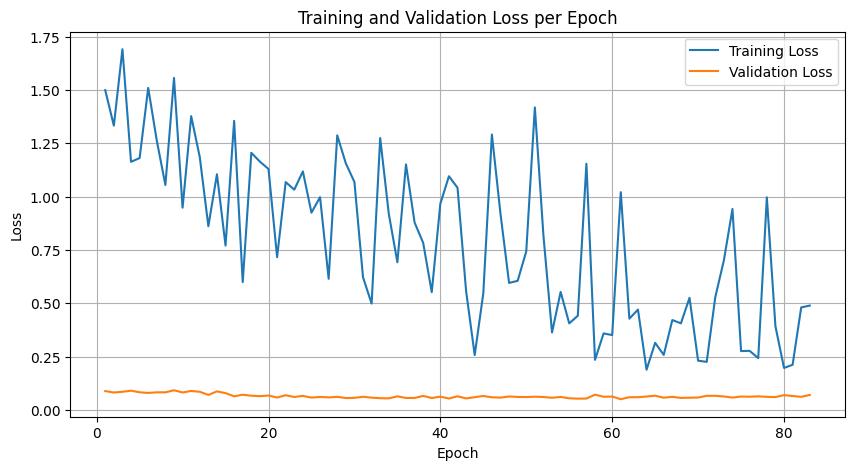

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))
train_losses_tensor = torch.tensor(train_losses)  # Convert list back to tensor if needed
val_losses_tensor = torch.tensor(val_losses)
train_losses = train_losses_tensor.cpu().numpy()
val_losses = val_losses_tensor.cpu().numpy()
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()


## Plot TSNE on test set

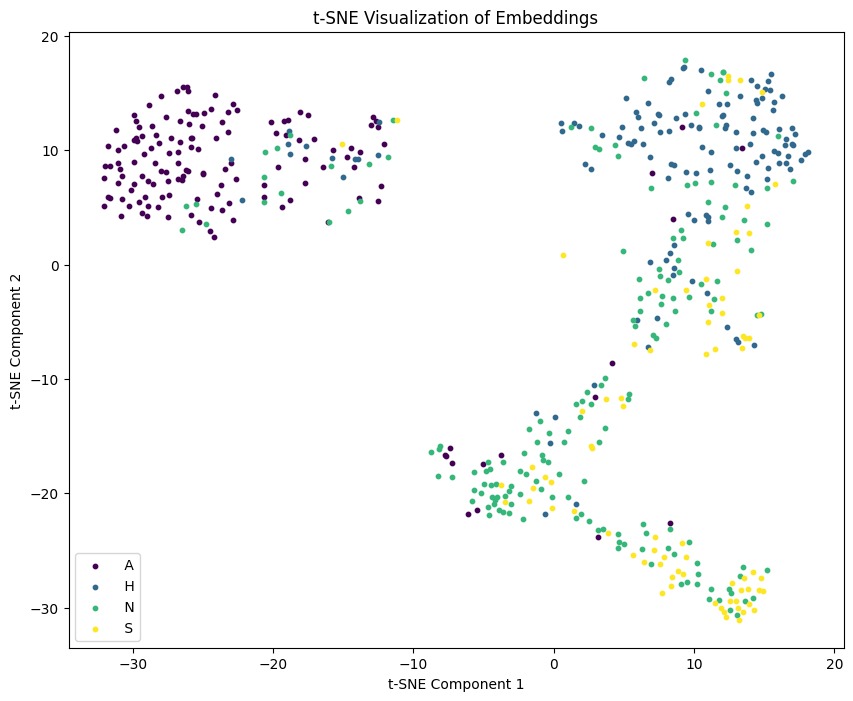

In [ ]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming true_labels and embs are already defined
classname=test_set.get_classname()
# Encode labels
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)

# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, random_state=0)
embs_2d = tsne.fit_transform(embs)

# Define the color map and labels
cmap = plt.get_cmap('viridis', len(label_encoder.classes_))
labels = label_encoder.classes_

# Plotting
plt.figure(figsize=(10, 8))

# Plot each class separately
for i, label in enumerate(labels):
    idx = true_labels_encoded == i
    plt.scatter(embs_2d[idx, 0], embs_2d[idx, 1], c=[cmap(i)], label=f' {classname[label]}', s=10)

# Add the legend
plt.legend()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Embeddings')
plt.show()
